# **Importing necessary libraries**

In [51]:
# Importing necessary libraries
import pandas as pd
import tensorflow as tf
import re

import spacy
from tqdm.notebook import tqdm
from tensorflow.keras.utils import to_categorical
import numpy as np

from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

## **Uploading Dataset**

In [2]:
# Importing the drive to google colab
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


In [3]:
# Reading the 2016 training data set in a pandas dataframe
df_train_2016 = pd.read_csv ('/gdrive/MyDrive/Colab Notebooks/Advanced NLP/twitter-2016train-BD.txt',sep="\t",
                             names=['ID', 'topic','emotion','User text'])
df_train_2016

,ID,topic,emotion,User text
0,628949369883000832,@microsoft,negative,dear @Microsoft the newOoffice for Mac is grea...
1,628976607420645377,@microsoft,negative,@Microsoft how about you make a system that do...
2,629023169169518592,@microsoft,negative,I may be ignorant on this issue but... should ...
3,629179223232479232,@microsoft,negative,"Thanks to @microsoft, I just may be switching ..."
4,629226490152914944,@microsoft,positive,"Microsoft, I may not prefer your gaming branch..."
...,...,...,...,...
4304,639166904813223937,metlife,positive,Heading up to MetLife tomorrow for the Jets game
4305,639295526995890177,metlife,positive,Going to MetLife tomorrow but not to see the b...
4306,639804828739346432,metlife,positive,It's the first Football Friday of the year. Th...
4307,639855845958885376,metlife,positive,@Racalto_SK ok good to know. Punting at MetLif...


In [4]:
# Reading the 2016 dev data set in a pandas dataframe
df_dtrain_2016 = pd.read_csv ('/gdrive/MyDrive/Colab Notebooks/Advanced NLP/twitter-2016dev-BD.txt',sep="\t",
                             names=['ID', 'topic','emotion','User text'])
df_dtrain_2016

,ID,topic,emotion,User text
0,638061181823922176,michael jackson,positive,Jay Z joins Instagram with nostalgic tribute t...
1,638091450132078593,michael jackson,positive,I liked a @YouTube video http://t.co/AaR3pjp2P...
2,638125563790557184,michael jackson,positive,18th anniv of Princess Diana's death. I still ...
3,638130776727535617,michael jackson,positive,@oridaganjazz The 1st time I heard Michael Jac...
4,638134980862828544,michael jackson,positive,'Michael Jackson' appeared on Saturday 29 at t...
...,...,...,...,...
1285,640906424290254849,snoop dogg,positive,May something in life make you as happy as Sno...
1286,640916034749263872,snoop dogg,positive,I need to become a celebrity so I can just be ...
1287,641037652414742528,snoop dogg,positive,Snoop dogg may be the funniest human alive
1288,641349309439479808,snoop dogg,positive,SNOOP DOGG AKA SNOOPADELIC friday friday only ...


In [5]:
# Reading the 2016 testing data set in a pandas dataframe
df_test_2016 = pd.read_csv ('/gdrive/MyDrive/Colab Notebooks/Advanced NLP/twitter-2016test-BD.txt',sep="\t",
                            names=['ID', 'topic','emotion','User text','empty row'])
df_test_2016

,ID,topic,emotion,User text,empty row
0,681563394940473347,amy schumer,negative,@MargaretsBelly Amy Schumer is the stereotypic...,NaN
1,675847244747177984,amy schumer,negative,@dani_pitter I mean I get the hype around JLaw...,NaN
2,672827854279843840,amy schumer,negative,Amy Schumer at the #GQmenoftheyear2015 party i...,NaN
3,662755012129529858,amy schumer,negative,Amy Schumer is on Sky Atlantic doing one of th...,NaN
4,671502639671042048,amy schumer,negative,"Amy Schumer may have brought us Trainwreck, bu...",NaN
...,...,...,...,...,...
10546,638032969383309312,zayn,positive,tomorrow I've to wake up early so Zayn's erfo...,NaN
10547,634711870570500096,zayn,positive,with Zayn gone I can now definitively say that...,NaN
10548,637134671797690368,zayn,positive,yo don't ever say that! god forbid! may it not...,NaN
10549,636413565780557824,zayn,positive,you may call me a bad fan but I sobbed so hard...,NaN


In [6]:
# Reading the 2016 dev testing data set in a pandas dataframe
df_dtest_2016 = pd.read_csv ('/gdrive/MyDrive/Colab Notebooks/Advanced NLP/twitter-2016devtest-BD.txt',sep="\t",
                             names=['ID', 'topic','emotion','User text'])
df_dtest_2016

,ID,topic,emotion,User text
0,637641175948763136,sony,positive,@SeeMonterey LOST - Sony cell phone with holid...
1,637666734300905472,sony,negative,Sony rewards app is like a lot of 19 y.o femal...
2,637668142110654468,sony,positive,@fakethom Have android tab and don't use phone...
3,637708370129125377,sony,positive,Finally I get my ps4 back I sent it to Sony ca...
4,637807521500020737,sony,negative,@AskPlayStation Why won't u guys help me out?!...
...,...,...,...,...
1412,638013292036923392,zlatan,positive,Zlatan is looking mighty attractive at the mom...
1413,638018562334916609,zlatan,positive,Wonder if Zlatan will be a United player come ...
1414,638033582112534529,zlatan,positive,"Today United should have done better, the refe..."
1415,638445576212754433,zlatan,positive,"Ok ed let's do this, Zlatan, greizmann and Lap..."


In [7]:
# Reading the 2015 training data set in a pandas dataframe
df_train_2015 = pd.read_csv ('/gdrive/MyDrive/Colab Notebooks/Advanced NLP/twitter-2015train-BD.txt',sep="\t",
                  names=['ID', 'topic','emotion','User text'])
df_train_2015

,ID,topic,emotion,User text
0,105121481662541824,#dexter,neutral,I forgot how sad the first episode of the 5th ...
1,104319460143415296,#dexter,positive,Oct. 2 is almost too far away for me to wait f...
2,103641916586999808,#dexter,positive,(OFF TOPIC) - there is only 3 episodes on the ...
3,100544750414864384,#dexter,neutral,@iheardavoicesay is finally catching up to me ...
4,102220476499243008,#dexter,neutral,"I downloaded the first season of #Dexter, gonn..."
...,...,...,...,...
484,264204267370450944,denzel,positive,"Cant wait to see \""""Flight\"""" on Saturday\u002..."
485,264184542305345537,denzel,positive,Gotta go see Flight tomorrow Denzel is the gre...
486,264243526005575680,denzel,positive,Hey I wanna see Flight tomorrow with Denzel ol...
487,264191631325020160,denzel,neutral,That movie Flight with Denzel looks really goo...


In [8]:
# Reading the 2015 testing data set in a pandas dataframe
df_test_2015 = pd.read_csv ('/gdrive/MyDrive/Colab Notebooks/Advanced NLP/twitter-2015test-BD.txt',sep="\t",
                            names=['ID', 'topic','emotion','User text','empty row'])
df_test_2015

,ID,topic,emotion,User text,empty row
0,522712800595300352,aaron rodgers,neutral,I just cut a 25 second audio clip of Aaron Rod...,NaN
1,522559216645840897,aaron rodgers,neutral,Tough loss for the Dolphins last Sunday in Mia...,NaN
2,522560839211962368,aaron rodgers,neutral,I'm wearing my Aaron Rodgers jersey to the Cha...,NaN
3,523065089977757696,aaron rodgers,negative,"@Espngreeny I'm a Fins fan, it's Friday, and A...",NaN
4,522563839305338880,aaron rodgers,neutral,When girls become bandwagon fans of the Packer...,NaN
...,...,...,...,...,...
2378,520957142816530432,younique,positive,Check out the gorgeous products from Younique!...,NaN
2379,522889214036156417,younique,neutral,LADIES! BULK ORDER GOES IN TOMORROW AT 10PM C...,NaN
2380,521416045865992192,younique,positive,"Here is something fun for you: On the 14th, I...",NaN
2381,522912399322394624,younique,positive,Get the best mascara in the industry here! Im ...,NaN


In [9]:
# Concatinating both 2015 and 2016 test dataset to one
df_test = pd.concat([df_test_2016,df_test_2015], axis = 0)
df_test

,ID,topic,emotion,User text,empty row
0,681563394940473347,amy schumer,negative,@MargaretsBelly Amy Schumer is the stereotypic...,NaN
1,675847244747177984,amy schumer,negative,@dani_pitter I mean I get the hype around JLaw...,NaN
2,672827854279843840,amy schumer,negative,Amy Schumer at the #GQmenoftheyear2015 party i...,NaN
3,662755012129529858,amy schumer,negative,Amy Schumer is on Sky Atlantic doing one of th...,NaN
4,671502639671042048,amy schumer,negative,"Amy Schumer may have brought us Trainwreck, bu...",NaN
...,...,...,...,...,...
2378,520957142816530432,younique,positive,Check out the gorgeous products from Younique!...,NaN
2379,522889214036156417,younique,neutral,LADIES! BULK ORDER GOES IN TOMORROW AT 10PM C...,NaN
2380,521416045865992192,younique,positive,"Here is something fun for you: On the 14th, I...",NaN
2381,522912399322394624,younique,positive,Get the best mascara in the industry here! Im ...,NaN


In [10]:
# Concatinating both 2015 and 2016 train dataset to one
df_train = pd.concat([df_train_2015,df_train_2016,df_dtrain_2016,df_dtest_2016],axis=0)
df_train

,ID,topic,emotion,User text
0,105121481662541824,#dexter,neutral,I forgot how sad the first episode of the 5th ...
1,104319460143415296,#dexter,positive,Oct. 2 is almost too far away for me to wait f...
2,103641916586999808,#dexter,positive,(OFF TOPIC) - there is only 3 episodes on the ...
3,100544750414864384,#dexter,neutral,@iheardavoicesay is finally catching up to me ...
4,102220476499243008,#dexter,neutral,"I downloaded the first season of #Dexter, gonn..."
...,...,...,...,...
1412,638013292036923392,zlatan,positive,Zlatan is looking mighty attractive at the mom...
1413,638018562334916609,zlatan,positive,Wonder if Zlatan will be a United player come ...
1414,638033582112534529,zlatan,positive,"Today United should have done better, the refe..."
1415,638445576212754433,zlatan,positive,"Ok ed let's do this, Zlatan, greizmann and Lap..."


In [12]:
df_test= df_test[df_test.columns.drop('empty row')]


In [13]:
# The samples of the training dataset
df_test.head()

,ID,topic,emotion,User text
0,681563394940473347,amy schumer,negative,@MargaretsBelly Amy Schumer is the stereotypic...
1,675847244747177984,amy schumer,negative,@dani_pitter I mean I get the hype around JLaw...
2,672827854279843840,amy schumer,negative,Amy Schumer at the #GQmenoftheyear2015 party i...
3,662755012129529858,amy schumer,negative,Amy Schumer is on Sky Atlantic doing one of th...
4,671502639671042048,amy schumer,negative,"Amy Schumer may have brought us Trainwreck, bu..."


In [14]:
# The samples of the testing dataset
df_train.head()

,ID,topic,emotion,User text
0,105121481662541824,#dexter,neutral,I forgot how sad the first episode of the 5th ...
1,104319460143415296,#dexter,positive,Oct. 2 is almost too far away for me to wait f...
2,103641916586999808,#dexter,positive,(OFF TOPIC) - there is only 3 episodes on the ...
3,100544750414864384,#dexter,neutral,@iheardavoicesay is finally catching up to me ...
4,102220476499243008,#dexter,neutral,"I downloaded the first season of #Dexter, gonn..."


In [15]:
import locale
def getpreferredencoding(do_setlocale = True):
    return "UTF-8"
locale.getpreferredencoding = getpreferredencoding

# **Preprocessing**

In [17]:
# intall emoji
!pip install emoji
import emoji


def preprocess_tweet(tweet: str) -> str:

  tweet = tweet.lower() #convert all the tweets to lowercase
  tweet = emoji.demojize(tweet) #demojize tweet into phrases insead of an emoji

  tweet = re.sub("#[A-Za-z0-9_]+","", tweet) # removal of hastags
  tweet = re.sub("@[A-Za-z0-9_]+","", tweet) #removal of mentions
  tweet = re.sub('http://\S+|https://\S+', '', tweet) #removal of url
  tweet = re.sub(r'[\'|"|#|:|,|)|(|\|/|_]',r'',tweet) #removal of non alphabet characters
  tweet = " ".join(tweet.split()) #extra spaces

  return tweet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 358.9/358.9 kB 9.0 MB/s eta 0:00:00


In [18]:
df_train["Cleaned tweet"] = df_train["User text"].apply(preprocess_tweet)
df_test["Cleaned tweet"] = df_test["User text"].apply(preprocess_tweet)

# **POS tagging**

In [21]:

nlp = spacy.load("en_core_web_sm")

def generate_pos_features(tweet: str) -> str:
  """
  Input: A cleaned tweet Eg:"bag is amazing"
  output: A lemmatized tweet with pos tags to each token. Eg:"bag-NN is-VB amazing-JJ"
  """
  res_str2 =''
  res_str3 = ''
  l=[]

  tweet_tag = nlp(tweet)
  # res_str = ' '.join([token.lemma_ for token in tweet_tag])

  # abc = nlp(res_str)

  for token in tweet_tag:
    l.append(token.lemma_ + '-' +token.tag_)

    res_str2 = ' '.join(l)
  return res_str2



def generate_pos_features1(tweet: str) -> str:
  """
  Input: A cleaned tweet Eg:"bag is amazing"
  output: pos tags to each lemmatized token. Eg:"NN VB JJ"
  """
  res_str2 =''
  l=[]

  tweet_tag = nlp(tweet)
  # res_str = ' '.join([token.lemma_ for token in tweet_tag])

  # abc = nlp(res_str)

  for token in tweet_tag:
    l.append(token.tag_)
    res_str2 = ' '.join(l)
  return res_str2

In [22]:
# Applying PoS Tagging to Cleaned tweet of both training and testing dataset and storing it in a new column 'Tweet with pos'
df_train["Tweet with pos"]= df_train["Cleaned tweet"].apply(generate_pos_features)
df_test["Tweet with pos"]= df_test["Cleaned tweet"].apply(generate_pos_features)



In [23]:
# Applying PoS Tagging to Cleaned tweet of both training and testing dataset and storing it in a new column 'Only pos sequence'
df_train["Only pos sequence"]= df_train["Cleaned tweet"].apply(generate_pos_features1)
df_test["Only pos sequence"]= df_test["Cleaned tweet"].apply(generate_pos_features1)


In [24]:

df_train.tail()

,ID,topic,emotion,User text,Cleaned tweet,Tweet with pos,Only pos sequence
1412,638013292036923392,zlatan,positive,Zlatan is looking mighty attractive at the mom...,zlatan is looking mighty attractive at the mom...,zlatan-NNP be-VBZ look-VBG mighty-RB attractiv...,NNP VBZ VBG RB JJ IN DT NN NNP VBZ RB VB DT NN...
1413,638018562334916609,zlatan,positive,Wonder if Zlatan will be a United player come ...,wonder if zlatan will be a united player come ...,wonder-VBP if-IN zlatan-NNP will-MD be-VB a-DT...,VBP IN NNP MD VB DT NNP NN VB NNP NN VBP PRP M...
1414,638033582112534529,zlatan,positive,"Today United should have done better, the refe...",today united should have done better the refer...,today-NN united-NNP should-MD have-VB do-VBN w...,NN NNP MD VB VBN RBR DT NN VBD RB VB RB RB . ....
1415,638445576212754433,zlatan,positive,"Ok ed let's do this, Zlatan, greizmann and Lap...",ok ed lets do this zlatan greizmann and laport...,ok-UH ed-NNP let-NNS do-VB this-DT zlatan-NNP ...,UH NNP NNS VB DT NNP NNP CC NN NN VBP PRP VB
1416,640276909633486849,zlatan,negative,Rib injury for Zlatan against Russia is a big ...,rib injury for zlatan against russia is a big ...,rib-NN injury-NN for-IN zlatan-NNP against-IN ...,NN NN IN NNP IN NNP VBZ DT JJ NN IN PRP VBZ NN...


In [25]:
df_test.tail()

,ID,topic,emotion,User text,Cleaned tweet,Tweet with pos,Only pos sequence
2378,520957142816530432,younique,positive,Check out the gorgeous products from Younique!...,check out the gorgeous products from younique!...,check-VB out-RP the-DT gorgeous-JJ product-NNS...,VB RP DT JJ NNS IN NN . VB PRP IN NNS CC NN IN...
2379,522889214036156417,younique,neutral,LADIES! BULK ORDER GOES IN TOMORROW AT 10PM C...,ladies! bulk order goes in tomorrow at 10pm cs...,lady-NNS !-. bulk-JJ order-NN go-VBZ in-IN tom...,NNS . JJ NN VBZ IN NN IN CD NN NNP NNP CD JJR ...
2380,521416045865992192,younique,positive,"Here is something fun for you: On the 14th, I...",here is something fun for you on the 14th i am...,here-RB be-VBZ something-NN fun-JJ for-IN you-...,RB VBZ NN JJ IN PRP IN DT JJ PRP VBP VBG TO VB...
2381,522912399322394624,younique,positive,Get the best mascara in the industry here! Im ...,get the best mascara in the industry here! im ...,get-VB the-DT good-JJS mascara-NN in-IN the-DT...,VB DT JJS NN IN DT NN RB . PRP VBP VBG JJ NN I...
2382,520917627460661248,younique,positive,Wakey Wakey! It's SATURDAY SHOPPING Day! Make ...,wakey wakey! its saturday shopping day! make s...,wakey-NN wakey-NN !-. its-PRP$ saturday-NNP sh...,NN NN . PRP$ NNP NNP NN . VB JJ TO VB PRP$ JJ ...


In [27]:
print('Positive tweets:',df_train['emotion'].value_counts()['positive'])
print('Negative tweets:',df_train['emotion'].value_counts()['negative'])
print('Neutral tweets:',df_train['emotion'].value_counts()['neutral'])

Positive tweets: 5802
Negative tweets: 1412
Neutral tweets: 288


# **Splitting the data-Training and Testing**

In [70]:
# splitting the training and testing data
y_train = df_train['emotion']
X_train= df_train[df_train.columns.drop('emotion')]

y_test = df_test['emotion']
X_test= df_test[df_train.columns.drop('emotion')]

In [71]:
'''Converting y training labels into number
          positive = 1
          Negative = -1
          Neutral = 0
'''
y =(list(y_train))
print(y)
for i in range(len(y)):
  if y[i] == 'positive':
    y[i]= 1
  elif y[i] =='negative':
    y[i] = -1
  else:
    y[i] = 0

y_train = np.array(y)
print(y_train)
type(y_train)

['neutral', 'positive', 'positive', 'neutral', 'neutral', 'neutral', 'neutral', 'positive', 'positive', 'neutral', 'positive', 'positive', 'positive', 'positive', 'positive', 'positive', 'positive', 'neutral', 'positive', 'neutral', 'neutral', 'neutral', 'positive', 'positive', 'positive', 'positive', 'positive', 'negative', 'positive', 'neutral', 'negative', 'neutral', 'neutral', 'positive', 'neutral', 'positive', 'neutral', 'positive', 'positive', 'neutral', 'neutral', 'positive', 'positive', 'positive', 'positive', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'positive', 'neutral', 'positive', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'negative', 'neutral', 'negative', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'positive', 'positive', 'negative', 'negative', 'neutral', 'neutral', 'off topic', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neu

numpy.ndarray

In [72]:
'''Converting y testing labels into number
          positive = 1
          Negative = -1
          Neutral = 0
'''
y1 =(list(y_test))
for i in range(len(y1)):
  if y1[i] == 'positive':
    y1[i]= 1
  elif y1[i] =='negative':
    y1[i] = -1
  else:
    y1[i] = 0
y_test = np.array(y1)

In [61]:
y_train

array([ 0,  1,  1, ...,  1,  1, -1])

In [63]:
# Training samples
X_train.head()

,ID,topic,User text,Cleaned tweet,Tweet with pos,Only pos sequence
0,105121481662541824,#dexter,I forgot how sad the first episode of the 5th ...,i forgot how sad the first episode of the 5th ...,I-PRP forget-VBD how-WRB sad-JJ the-DT first-J...,PRP VBD WRB JJ DT JJ NN IN DT JJ NN IN NN VBZ .
1,104319460143415296,#dexter,Oct. 2 is almost too far away for me to wait f...,oct. 2 is almost too far away for me to wait f...,oct-NNP .-NNP 2-CD be-VBZ almost-RB too-RB far...,NNP NNP CD VBZ RB RB RB RB IN PRP TO VB IN DT ...
2,103641916586999808,#dexter,(OFF TOPIC) - there is only 3 episodes on the ...,off topic - there is only 3 episodes on the fi...,off-RP topic-NN --: there-EX be-VBZ only-RB 3-...,RP NN : EX VBZ RB CD NNS IN DT JJ NN IN . UH V...
3,100544750414864384,#dexter,@iheardavoicesay is finally catching up to me ...,is finally catching up to me with . im only up...,be-VBZ finally-RB catch-VBG up-RP to-IN I-PRP ...,VBZ RB VBG RP IN PRP IN . PRP VBP RB IN TO NN ...
4,102220476499243008,#dexter,"I downloaded the first season of #Dexter, gonn...",i downloaded the first season of gonna start w...,I-PRP download-VBD the-DT first-JJ season-NN o...,PRP VBD DT JJ NN IN NN TO VB VBG DT JJ NN . NN...


In [64]:
# Testing samples
X_test.head()

,ID,topic,User text,Cleaned tweet,Tweet with pos,Only pos sequence
0,681563394940473347,amy schumer,@MargaretsBelly Amy Schumer is the stereotypic...,amy schumer is the stereotypical 1st world lac...,amy-NNP schumer-NNP be-VBZ the-DT stereotypica...,NNP NNP VBZ DT JJ NN NN NNP NNP NNP . CC PRP V...
1,675847244747177984,amy schumer,@dani_pitter I mean I get the hype around JLaw...,i mean i get the hype around jlaw. i may not l...,I-PRP mean-VBP I-PRP get-VBP the-DT hype-NN ar...,PRP VBP PRP VBP DT NN IN NN . PRP MD RB VB PRP...
2,672827854279843840,amy schumer,Amy Schumer at the #GQmenoftheyear2015 party i...,amy schumer at the party in a dress we pretty ...,amy-NNP schumer-NN at-IN the-DT party-NN in-IN...,NNP NN IN DT NN IN DT NN PRP RB RB VBP
3,662755012129529858,amy schumer,Amy Schumer is on Sky Atlantic doing one of th...,amy schumer is on sky atlantic doing one of th...,amy-NNP schumer-NN be-VBZ on-IN sky-NN atlanti...,NNP NN VBZ IN NN JJ VBG CD IN DT JJS VB RP NNS...
4,671502639671042048,amy schumer,"Amy Schumer may have brought us Trainwreck, bu...",amy schumer may have brought us trainwreck but...,amy-NNP schumer-NN may-MD have-VB bring-VBN we...,NNP NN MD VB VBN PRP NN CC DT NN RB VBD VBN RP .


In [69]:
y_train[0]

array([1., 0., 0.], dtype=float32)

# **ML classifiers**

In [77]:
classifiers = {}

# Logistic Regression
classifiers['Logistic Regression'] = LogisticRegression()

# Support Vector Machines
classifiers['Support Vector Machines'] = LinearSVC()

# Decision Trees
classifiers['Decision Trees'] = DecisionTreeClassifier()

# Random Forest
classifiers['Random Forest'] = RandomForestClassifier()

# Naive Bayes
classifiers['Naive Bayes'] = GaussianNB()

# K-Nearest Neighbors
classifiers['K-Nearest Neighbor'] = KNeighborsClassifier()

## Cleaned Tweets

In [78]:
# Vectorization of cleaned tweets
tfidf_vectorizer = TfidfVectorizer(stop_words="english")
tfidf_vectorizer.fit(X_train["Cleaned tweet"])
Xtrain_tfidf_cleaned_tweet = tfidf_vectorizer.transform(X_train["Cleaned tweet"])
Xtest_tfidf_cleaned_tweet = tfidf_vectorizer.transform(X_test["Cleaned tweet"])

In [79]:
# Calculating the predictions and evaluatingthe model
accuracy, precision, AvgRecall,f1 = {}, {}, {},{}

for key in classifiers.keys():

    # Fit the classifier
    classifiers[key].fit(Xtrain_tfidf_cleaned_tweet.toarray(), y_train)

    # Make predictions
    predictions = classifiers[key].predict(Xtest_tfidf_cleaned_tweet.toarray())

    # Evaluation metrics - Avg Recall and F1 are the primary evaluating scores
    accuracy[key] = accuracy_score(predictions, y_test)
    precision[key] = precision_score(predictions, y_test,average='micro')
    AvgRecall[key] = recall_score(predictions, y_test,average='weighted')
    f1[key] = f1_score(predictions, y_test,average='weighted')


In [80]:


df_model = pd.DataFrame(index=classifiers.keys(), columns=['Accuracy', 'Precision', 'AvgRecall'])
df_model['Accuracy'] = accuracy.values()
df_model['Precision'] = precision.values()
df_model['AvgRecall'] = AvgRecall.values()
df_model['F1 score'] = f1.values()
df_model.style.set_caption("Results of training the Cleaned tweets")
df_model

,Accuracy,Precision,AvgRecall,F1 score
Logistic Regression,0.715092,0.715092,0.715092,0.813843
Support Vector Machines,0.724293,0.724293,0.724293,0.785737
Decision Trees,0.679063,0.679063,0.679063,0.742766
Random Forest,0.708675,0.708675,0.708675,0.813674
Naive Bayes,0.620303,0.620303,0.620303,0.634368
K-Nearest Neighbor,0.711458,0.711458,0.711458,0.787005


In [81]:
import matplotlib.pyplot as plt

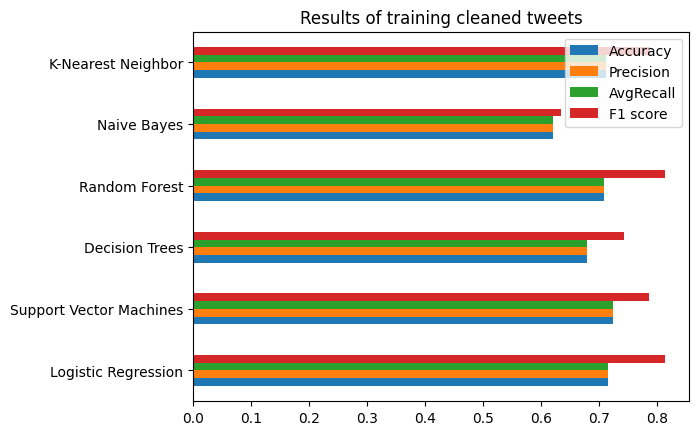

<Figure size 4000x1600 with 0 Axes>

In [82]:
ax = df_model.plot.barh(title = 'Results of training cleaned tweets')
plt.figure(figsize=(40,16))
plt.tight_layout()

## Cleaned Tweets with POS Tags

In [83]:
# Vectorization of cleaned tweets with PoS Tagging
tfidf_vectorizer = TfidfVectorizer(stop_words="english")
tfidf_vectorizer.fit(X_train["Tweet with pos"])
Xtrain_tfidf_pos = tfidf_vectorizer.transform(X_train["Tweet with pos"])
Xtest_tfidf_pos = tfidf_vectorizer.transform(X_test["Tweet with pos"])

In [84]:
# Calculating the predictions and evaluatingthe model
accuracy, precision, AvgRecall,f1 = {}, {}, {},{}

for key in classifiers.keys():

    # Fit the classifier
    classifiers[key].fit(Xtrain_tfidf_pos.toarray(), y_train)

    # Make predictions
    predictions = classifiers[key].predict(Xtest_tfidf_pos.toarray())

    # Evaluation metrics - Avg Recall and F1 are the primary evaluating scores
    accuracy[key] = accuracy_score(predictions, y_test)
    precision[key] = precision_score(predictions, y_test,average='micro')
    AvgRecall[key] = recall_score(predictions, y_test,average='weighted')
    f1[key] = f1_score(predictions, y_test,average='weighted')


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [85]:


df_model = pd.DataFrame(index=classifiers.keys(), columns=['Accuracy', 'Precision', 'AvgRecall'])
df_model['Accuracy'] = accuracy.values()
df_model['Precision'] = precision.values()
df_model['AvgRecall'] = AvgRecall.values()
df_model['F1 score'] = f1.values()
df_model.style.set_caption("Results of training the Cleaned tweets")
df_model

,Accuracy,Precision,AvgRecall,F1 score
Logistic Regression,0.722050,0.722050,0.722050,0.812043
Support Vector Machines,0.728777,0.728777,0.728777,0.786953
Decision Trees,0.699552,0.699552,0.699552,0.766390
Random Forest,0.703727,0.703727,0.703727,0.821621
Naive Bayes,0.591387,0.591387,0.591387,0.595888
K-Nearest Neighbor,0.710608,0.710608,0.710608,0.789148


In [86]:
import matplotlib.pyplot as plt

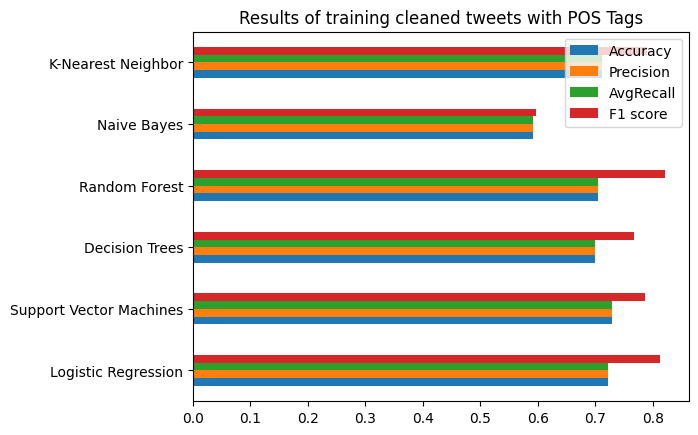

<Figure size 4000x1600 with 0 Axes>

In [87]:
ax = df_model.plot.barh(title = 'Results of training cleaned tweets with POS Tags')
plt.figure(figsize=(40,16))
plt.tight_layout()

## POS  tag Sequence

In [88]:
# # Vectorization of only PoS tag sequence
tfidf_vectorizer = TfidfVectorizer(stop_words="english")
tfidf_vectorizer.fit(X_train["Only pos sequence"])
Xtrain_tfidf_only_pos = tfidf_vectorizer.transform(X_train["Only pos sequence"])
Xtest_tfidf_only_pos = tfidf_vectorizer.transform(X_test["Only pos sequence"])

In [89]:
# Calculating the predictions and evaluatingthe model
accuracy, precision, AvgRecall,f1 = {}, {}, {},{}

for key in classifiers.keys():

    # Fit the classifier
    classifiers[key].fit(Xtrain_tfidf_only_pos.toarray(), y_train)

    # Make predictions
    predictions = classifiers[key].predict(Xtest_tfidf_only_pos.toarray())

    # Evaluation metrics - Avg Recall and F1 are the primary evaluating scores
    accuracy[key] = accuracy_score(predictions, y_test)
    precision[key] = precision_score(predictions, y_test,average='micro')
    AvgRecall[key] = recall_score(predictions, y_test,average='weighted')
    f1[key] = f1_score(predictions, y_test,average='weighted')


In [90]:


df_model = pd.DataFrame(index=classifiers.keys(), columns=['Accuracy', 'Precision', 'AvgRecall'])
df_model['Accuracy'] = accuracy.values()
df_model['Precision'] = precision.values()
df_model['AvgRecall'] = AvgRecall.values()
df_model['F1 score'] = f1.values()
df_model.style.set_caption("Results of training the Cleaned tweets")
df_model

,Accuracy,Precision,AvgRecall,F1 score
Logistic Regression,0.702644,0.702644,0.702644,0.816732
Support Vector Machines,0.703031,0.703031,0.703031,0.822129
Decision Trees,0.591464,0.591464,0.591464,0.611030
Random Forest,0.699784,0.699784,0.699784,0.817842
Naive Bayes,0.114504,0.114504,0.114504,0.172587
K-Nearest Neighbor,0.670867,0.670867,0.670867,0.741822


In [91]:
import matplotlib.pyplot as plt

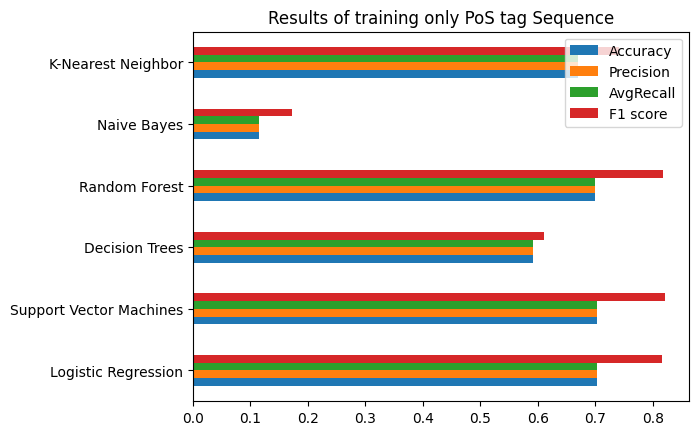

<Figure size 4000x1600 with 0 Axes>

In [92]:
ax = df_model.plot.barh(title = 'Results of training only PoS tag Sequence')
plt.figure(figsize=(40,16))
plt.tight_layout()